<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [3]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


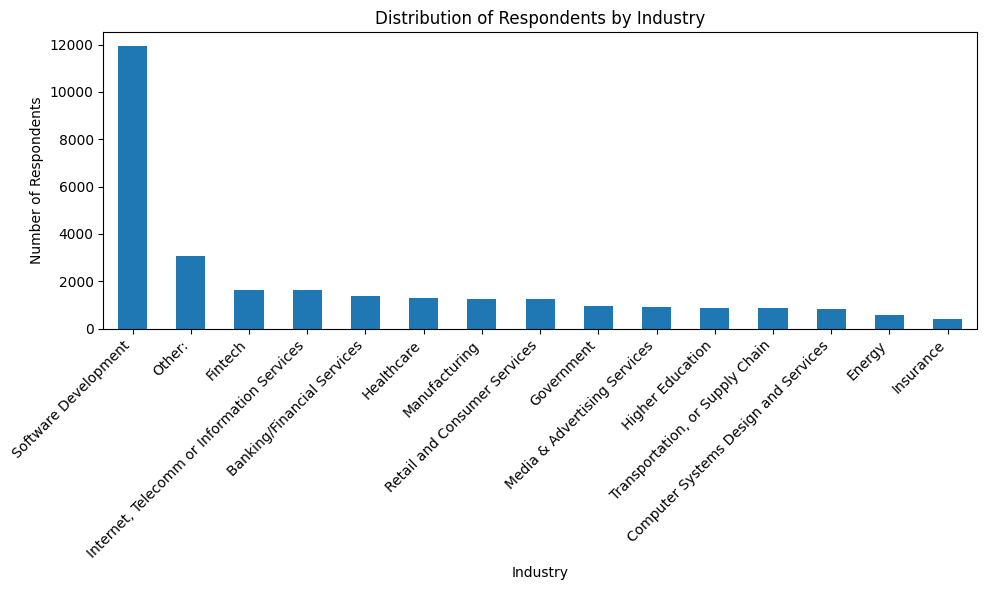

In [4]:
##Write your code here
# Count respondents by industry
industry_counts = df['Industry'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
industry_counts.plot(kind='bar')

plt.title('Distribution of Respondents by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# The bar chart shows how respondents are distributed across industries. A small number of industries account for a large proportion of respondents, indicating higher participation from those sectors. Other industries have lower representation, suggesting that the dataset is more concentrated in certain fields rather than evenly distributed.

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [7]:
##Write your code here
comp_df = df[['ConvertedCompYearly']].dropna()

mean_comp = comp_df['ConvertedCompYearly'].mean()
median_comp = comp_df['ConvertedCompYearly'].median()
std_comp = comp_df['ConvertedCompYearly'].std()

mean_comp, median_comp, std_comp

outlier_threshold = mean_comp + 3 * std_comp
outlier_threshold

high_comp_outliers = comp_df[
    comp_df['ConvertedCompYearly'] > outlier_threshold
]

high_comp_outliers

# The mean, median, and standard deviation of yearly compensation were calculated to understand the overall distribution. Respondents earning more than three standard deviations above the mean were identified as high-compensation outliers. These extreme values indicate a small number of respondents with substantially higher earnings compared to the rest of the dataset and may influence overall summary statistics.

,ConvertedCompYearly
529,650000.0
828,1000000.0
1932,945000.0
2171,750000.0
2187,2000000.0
...,...
38219,1000000.0
39643,1300000.0
40066,800000.0
40952,750000.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


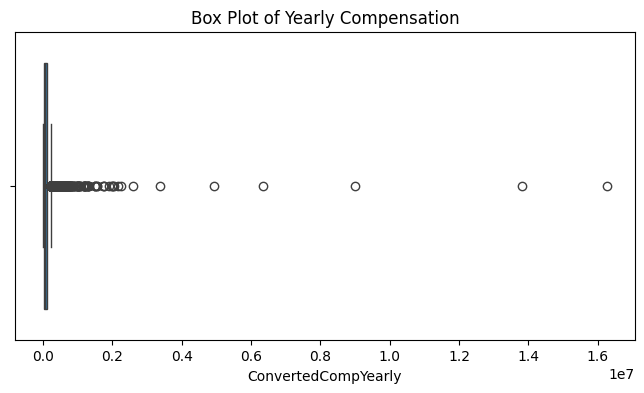

In [8]:
##Write your code here
comp_df = df[['ConvertedCompYearly']].dropna()

Q1 = comp_df['ConvertedCompYearly'].quantile(0.25)
Q3 = comp_df['ConvertedCompYearly'].quantile(0.75)

IQR = Q3 - Q1

Q1, Q3, IQR

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

outliers = comp_df[
    (comp_df['ConvertedCompYearly'] < lower_bound) |
    (comp_df['ConvertedCompYearly'] > upper_bound)
]

outliers.shape[0]

plt.figure(figsize=(8, 4))
sns.boxplot(x=comp_df['ConvertedCompYearly'])

plt.title('Box Plot of Yearly Compensation')
plt.xlabel('ConvertedCompYearly')
plt.show()

# The IQR method was used to identify compensation outliers by calculating the interquartile range and defining upper and lower bounds. Values outside these bounds represent unusually low or high compensation levels. The box plot highlights these extreme values, showing that a small number of respondents earn significantly more than the majority, which may skew summary statistics.

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [11]:
##Write your code here
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[
    (df['ConvertedCompYearly'] >= lower_bound) &
    (df['ConvertedCompYearly'] <= upper_bound)
]
df.shape, df_no_outliers.shape

# Outliers in yearly compensation were removed using the IQR method. A new DataFrame was created excluding rows with extreme compensation values. Comparing the dataset sizes confirms that only a small portion of records were removed, resulting in a cleaner dataset for further analysis.

((65437, 114), (22457, 114))

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [ ]:
##Write your code here
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

df['Age_numeric'] = df['Age'].map(age_mapping)

numeric_df = df.select_dtypes(include='number')

correlation_matrix = numeric_df.corr()
correlation_matrix


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
